<a href="https://colab.research.google.com/github/arfanrifqi/loan_prediction/blob/main/final_project_VIX_ID_X_Partners_lending_loan_prediction(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
load_data = pd.read_csv('/content/gdrive/MyDrive/dataset/loan_data_2007_2014.csv')

load_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#**describe statistic**

In [4]:
load_data.describe(include='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


In [5]:
pd.options.display.max_columns = 50
print(load_data.head())

   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT   

In [6]:
load_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [7]:
df_load = load_data[['loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type','acc_now_delinq',
       'tot_cur_bal','total_rev_hi_lim']].copy()

df_load.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,...,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
1,2500,2500,2500.0,60 months,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,...,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
2,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,...,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
3,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,...,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
4,3000,3000,3000.0,60 months,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,...,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN


In [46]:
df_load.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,5
1,float64,27
2,object,22


#**value count of categorical columns**

In [8]:
cat = ['term','grade','sub_grade','emp_title','emp_length',
       'home_ownership','verification_status','issue_d','loan_status',
       'pymnt_plan','purpose','title','addr_state','earliest_cr_line',
       'initial_list_status','application_type','policy_code']

In [9]:
df_load[cat].describe(include='all')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,initial_list_status,application_type,policy_code
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,466265,466285,466256,466285,466285,466285.0
unique,2,7,35,205475,11,6,3,91,9,2,14,63099,50,664,2,1,NaN
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,CA,Oct-00,f,INDIVIDUAL,NaN
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,274195,164075,71450,3674,303005,466285,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
for col in cat:
  print(f'''value count kolom {col} :''')
  print(df_load[col].value_counts())
  print()

value count kolom term :
 36 months    337953
 60 months    128332
Name: term, dtype: int64

value count kolom grade :
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

value count kolom sub_grade :
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

value count kolom emp_title :
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eas

In [11]:
df_load['term_months'] = df_load['term'].replace([' 36 months',' 60 months'],['36','60'])

In [12]:
df_load['term_months'].unique()

array(['36', '60'], dtype=object)

In [13]:
df_load['loan_status'] = df_load['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off'],['Fully Paid','Charged Off'])

In [14]:
df_load['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

In [15]:
term_num = ['term_months']

df_load[term_num] = df_load[term_num].apply(pd.to_numeric, errors='coerce', axis=1)
print(df_load['term_months'].dtypes)

int64


#**correlation**

In [16]:
corr = df_load.corr(method = 'spearman')
new_corr =corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [17]:
new_corr[new_corr.correlation >= 0.5]

,level_0,level_1,correlation
527,out_prncp_inv,out_prncp,0.999999
32,funded_amnt,loan_amnt,0.998809
65,funded_amnt_inv,funded_amnt,0.994772
593,total_pymnt_inv,total_pymnt,0.993899
64,funded_amnt_inv,loan_amnt,0.993207
758,collection_recovery_fee,recoveries,0.976526
97,installment,funded_amnt,0.966033
96,installment,loan_amnt,0.964087
98,installment,funded_amnt_inv,0.960155
625,total_rec_prncp,total_pymnt,0.946659


#**Exploratory Data Analysis categorical**

In [18]:
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

##**EDA on term variable**

###**graph of grade against term**

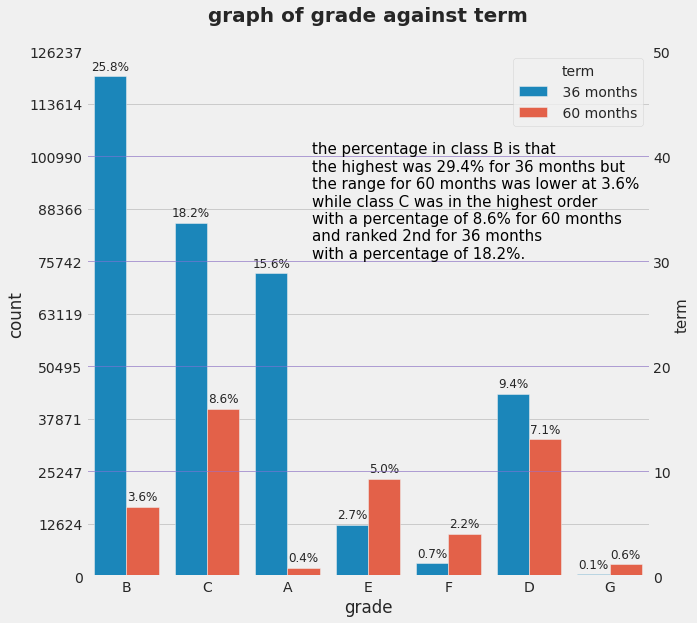

In [19]:
ncount = len(df_load['term'])

plt.figure(figsize=(9,9))
ax = sns.countplot(x="grade",hue='term', data=df_load)
plt.title('graph of grade against term',fontsize=20, loc='center', pad=30, fontweight='bold')

ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')

text = '''
the percentage in class B is that
the highest was 29.4% for 36 months but 
the range for 60 months was lower at 3.6% 
while class C was in the highest order 
with a percentage of 8.6% for 60 months 
and ranked 2nd for 36 months 
with a percentage of 18.2%.

'''

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.1f}%".format(100.*y/ncount),  
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points',
                        fontsize=12)
    
ax2=ax.twinx()
ax2.grid(axis='y', linestyle='-', linewidth=0.5, color='mediumpurple')

ax2.yaxis.tick_right()
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0,50)

plt.text(2.3,27,text,horizontalalignment='left',color='black',fontsize=15) 
plt.ylabel('term', fontsize=15)
plt.xlabel('grade', fontsize=15)

plt.show()

###**table of sub_grade againt term**

In [20]:
counts_sub_grade = df_load.groupby(["sub_grade", "term"])["application_type"].count().unstack()
counts_sub_grade.style.background_gradient(axis=0,cmap=sns.light_palette('mediumpurple', as_cmap=True))

term,36 months,60 months
sub_grade,,
A1,10541.000000,nan
A2,10942.000000,14.000000
A3,12527.000000,41.000000
A4,18736.000000,309.000000
A5,20138.000000,1619.000000
B1,20845.000000,2031.000000
B2,24144.000000,2466.000000
B3,27757.000000,3929.000000
B4,25734.000000,4771.000000


the results of the comparison table between sub_grade and term there is the highest class for B3 of 27757 for 36 months, while in class C4 the highest order is at 60 months with a value of 9659

###**table of emp_length against term**

In [21]:
counts_emp_length = df_load.groupby(["emp_length", "term"])["application_type"].count().unstack()
counts_emp_length.style.background_gradient(axis=0,cmap=sns.light_palette('mediumpurple', as_cmap=True))

term,36 months,60 months
emp_length,,
1 year,22771,6851
10+ years,101074,48975
2 years,31294,10079
3 years,27573,9023
4 years,21015,7008
5 years,22749,8025
6 years,19132,6980
7 years,18732,7448
8 years,16046,6349


the results of the comparison table between emp_length and term there is the highest years is 10+ years of 101074 for 36 months and 60 months with a value of 48975

###**graph of home_ownership against term**

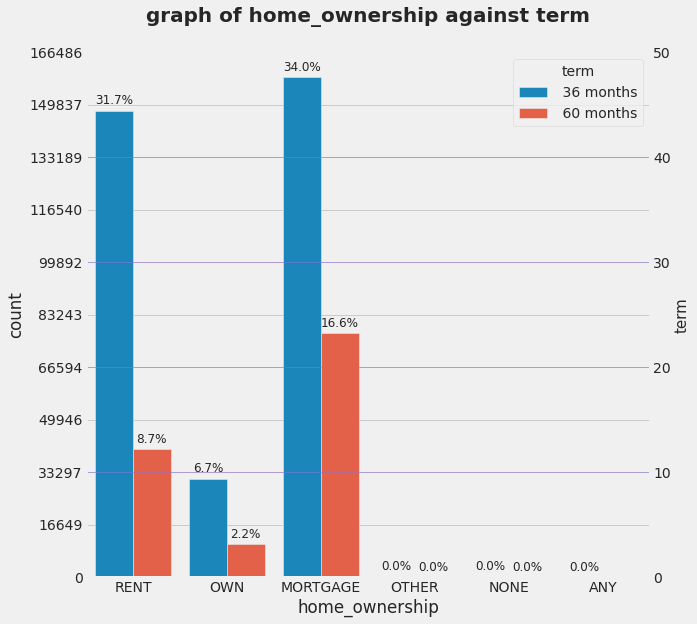

In [22]:
ncount = len(df_load['term'])

plt.figure(figsize=(9,9))
ax = sns.countplot(x="home_ownership",hue='term', data=df_load)
plt.title('graph of home_ownership against term',fontsize=20, loc='center', pad=30, fontweight='bold')

ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')

text = '''

'''

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.1f}%".format(100.*y/ncount),  
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points',
                        fontsize=12)
    
ax2=ax.twinx()
ax2.grid(axis='y', linestyle='-', linewidth=0.5, color='mediumpurple')

ax2.yaxis.tick_right()
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0,50)

plt.text(2.3,27,text,horizontalalignment='left',color='black',fontsize=15) 
plt.ylabel('term', fontsize=15)
plt.xlabel('grade', fontsize=15)

plt.show()

hasil grafik pada term terhadap home_ownership menunjukkan bahwa pada kelas mortgage tertinggi yaitu 34% untuk yang 36 bulan dan 16.6% untuk yang 60 bulan

###**graph of pymnt_plan against term**

In [23]:
counts_pymnt_plan = df_load.groupby(["pymnt_plan", "term"])["application_type"].count().unstack()
counts_pymnt_plan

term,36 months,60 months
pymnt_plan,,
n,337949,128327
y,4,5


###**table of purpose against term**

In [24]:
counts_purpose = df_load.groupby(["purpose", "term"])["application_type"].count().unstack()
counts_purpose.style.background_gradient(axis=0,cmap=sns.light_palette('mediumpurple', as_cmap=True))

term,36 months,60 months
purpose,,
car,4185,1212
credit_card,79730,24427
debt_consolidation,190780,83415
educational,405,17
home_improvement,18665,7872
house,1610,659
major_purchase,7685,2143
medical,3813,789
moving,2600,394


pada hasil tabel term terhadap purpose menunjukkan nilai pada debt_consolidation tertinggi di kelasnya yaitu sebesar 190780 untuk yang 36 bulan dan 83415 untuk yang 60 bulan

###**graph of loan_status against term**

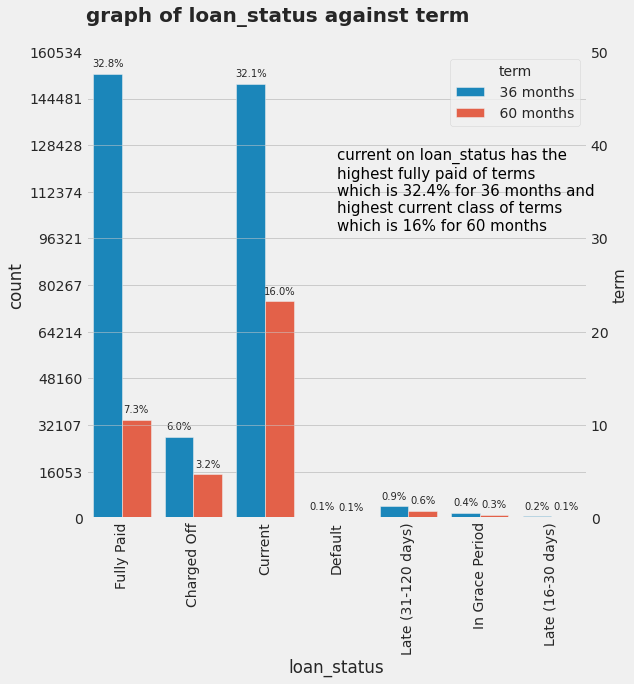

In [25]:
ncount = len(df_load['term'])



plt.figure(figsize=(8,8))
ax = sns.countplot(x="loan_status",hue='term', data=df_load)
plt.title('graph of loan_status against term',fontsize=20, loc='left', pad=30, fontweight='bold')
plt.xticks(rotation=90)
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')

text = '''
current on loan_status has the 
highest fully paid of terms 
which is 32.4% for 36 months and
highest current class of terms
which is 16% for 60 months 
'''

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.1f}%".format(100.*y/ncount),  
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points',
                        fontsize=10)
 
ax2=ax.twinx()
ax2.yaxis.tick_right()
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.grid(axis='y', linestyle='-', linewidth=0.5)   
ax2.set_ylim(0,50)


plt.text(3,29,text,horizontalalignment='left',color='black',fontsize=15) 
plt.ylabel('term', fontsize=15)
plt.xlabel('loan_status', fontsize=15)

plt.show()

###**table of addr_state against terms**

In [26]:
counts_addr_state = df_load.groupby(["addr_state", "term"])["application_type"].count().unstack()
counts_addr_state.style.background_gradient(axis=0,cmap=sns.light_palette('mediumpurple', as_cmap=True))

term,36 months,60 months
addr_state,,
AK,911.000000,340.000000
AL,3950.000000,1903.000000
AR,2525.000000,963.000000
AZ,7895.000000,2817.000000
CA,54801.000000,16649.000000
CO,7041.000000,2698.000000
CT,5172.000000,2032.000000
DC,1115.000000,311.000000
DE,861.000000,411.000000


pada tabel term terhadap addr_state menunjukkan kelas CA tertinggi dengan nilai sebesar 54801 untuk yang 36 bulan dan 16649 untuk yang 60 bulan

##**EDA on grade variable**

###**table of emp_length against grade**

In [27]:
counts_emp_length = df_load.groupby(["emp_length", "grade"])["application_type"].count().unstack()
counts_emp_length.style.background_gradient(axis=1,cmap=sns.light_palette('mediumpurple', as_cmap=True))

grade,A,B,C,D,E,F,G
emp_length,,,,,,,
1 year,4976,8790,7793,4888,2194,772,209
10+ years,23244,43349,41006,24877,11935,4477,1161
2 years,6859,12440,10815,6774,3079,1128,278
3 years,6110,10845,9730,5996,2685,986,244
4 years,4694,8200,7411,4639,2119,773,187
5 years,5130,9189,8097,4979,2317,871,191
6 years,4189,7738,7087,4244,1911,770,173
7 years,4010,7729,7022,4430,2013,788,188
8 years,3457,6706,6102,3614,1712,649,155


dari hasil tabel grade terhadap emp_length terdapat kelas yang menunujukkan durasi pekerjaan 10+ tahun memiliki nilai tertinggi yaitu kelas B sebesar 43349

###**table of home_ownership against grade**

In [28]:
counts_home_ownership1 = df_load.groupby(["home_ownership", "grade"])["application_type"].count().unstack()
counts_home_ownership1.style.background_gradient(axis=1,cmap=sns.light_palette('mediumpurple', as_cmap=True))

grade,A,B,C,D,E,F,G
home_ownership,,,,,,,
ANY,nan,1.000000,nan,nan,nan,nan,nan
MORTGAGE,43513.000000,69869.000000,61727.000000,35832.000000,17160.000000,6118.000000,1656.000000
NONE,10.000000,14.000000,10.000000,9.000000,1.000000,5.000000,1.000000
OTHER,26.000000,51.000000,44.000000,30.000000,17.000000,7.000000,7.000000
OWN,6422.000000,12142.000000,11211.000000,7065.000000,3308.000000,1226.000000,330.000000
RENT,24896.000000,54852.000000,52301.000000,33952.000000,15271.000000,5873.000000,1328.000000


pada tabel tersebut menunjukkan bahwa kelas mortgage dari fitur home_ownership memiliki nilai tertinggi yaitu sebesar 69869 di kelas B

###**table of loan_status against grade**

In [29]:
counts_loan_status = df_load.groupby(["loan_status", "grade"])["application_type"].count().unstack()
counts_loan_status.style.background_gradient(axis=1,cmap=sns.light_palette('mediumpurple', as_cmap=True))

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2535,9242,12069,9945,5868,2778,799
Current,35191,64009,63351,37460,17229,5697,1289
Default,30,149,258,212,130,37,16
Fully Paid,36545,61231,46299,26583,10947,4081,1041
In Grace Period,176,681,900,713,442,184,50
Late (16-30 days),58,249,359,284,175,75,18
Late (31-120 days),332,1368,2057,1691,966,377,109


pada tabel grade terhadap loan_status, kelas current menjadi yang tertinggi dengan nilai 64009 di kelas B

###**table of purpose againts grade**

In [30]:
counts_purpose = df_load.groupby(["purpose", "grade"])["application_type"].count().unstack()
counts_purpose.style.background_gradient(axis=0,cmap=sns.light_palette('mediumpurple', as_cmap=True))

grade,A,B,C,D,E,F,G
purpose,,,,,,,
car,1589,1635,1166,651,243,93,20
credit_card,23423,37495,26086,11708,4073,1127,245
debt_consolidation,37176,78869,77959,47853,22501,7965,1872
educational,88,111,115,52,37,11,8
home_improvement,5068,7405,6929,4104,2083,735,213
house,349,497,469,390,296,188,80
major_purchase,2455,2757,2271,1450,610,227,58
medical,513,920,1189,1081,597,244,58
moving,294,502,640,788,490,233,47


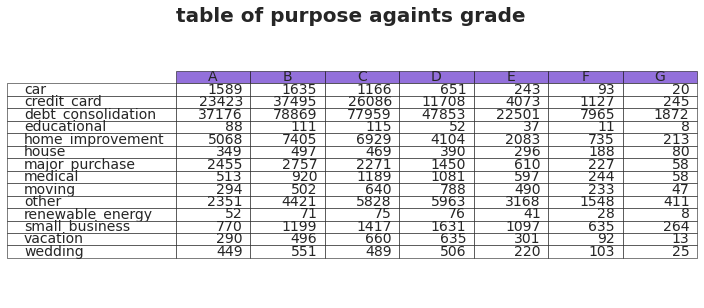

In [31]:
row_purpose = ['car','credit_card','debt_consolidation',
               'educational','home_improvement','house',
               'major_purchase','medical','moving','other',
               'renewable_energy','small_business','vacation',
               'wedding']    

counts_purpose = df_load.groupby(["purpose", "grade"])["application_type"].count().unstack()


fig, ax = plt.subplots(figsize=(10,4.5))
plt.title('table of purpose againts grade',fontsize=20, loc='left', fontweight='bold')
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


table = ax.table(cellText=counts_purpose.values, 
                 colLabels=counts_purpose.columns,
                 rowLabels=row_purpose,
                 colColours=['mediumpurple'] * 7, 
                 loc='center',
                 )
    

fig.tight_layout()
plt.show()

nilai tertinggi pada tabel tersebut yaitu debt_consolidation sebesar 78869 di kelas B

###**graph of initial_list_status againts grade**

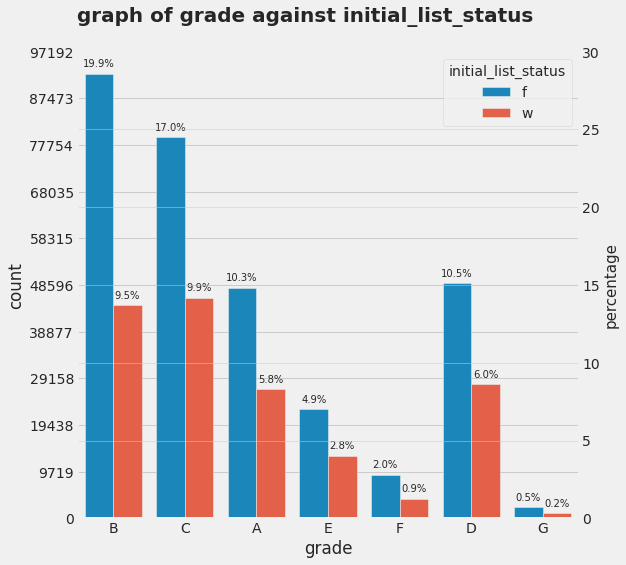

In [32]:
ncount = len(df_load['initial_list_status'])



plt.figure(figsize=(8,8))
ax = sns.countplot(x="grade",hue='initial_list_status', data=df_load)
plt.title('graph of grade against initial_list_status',fontsize=20, loc='left', pad=30, fontweight='bold')

ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')

text = '''

'''

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.1f}%".format(100.*y/ncount),  
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points',
                        fontsize=10)
 
ax2=ax.twinx()
ax2.grid(axis='y', linestyle='-', linewidth=0.5)
ax2.yaxis.tick_right()
   
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

ax2.set_ylim(0,30)


plt.text(3,29,text,horizontalalignment='left',color='black',fontsize=15) 
plt.ylabel('percentage', fontsize=15)
plt.xlabel('grade', fontsize=15)

plt.show()

hasil grafik antara variabel initial_list_status dengan grade menunjukkan nilai grade B paling tinggi yaitu 19.9% untuk f sedangkan grade C 9.9% untuk w

###**table of verification_status againts grade**

In [33]:
counts_verification_status = df_load.groupby(["verification_status", "grade"])["application_type"].count().unstack()
counts_verification_status.style.background_gradient(axis=0,cmap=sns.light_palette('mediumpurple', as_cmap=True))

grade,A,B,C,D,E,F,G
verification_status,,,,,,,
Not Verified,33233,53583,35807,18663,5256,1407,288
Source Verified,22636,40421,41781,27116,12863,4175,1001
Verified,18998,42925,47705,31109,17638,7647,2033


pada tabel berikut nilai tertinggi di grade B pada Not verified

##**EDA on emp_length variable**

###**table of home_ownership againts emp_length**

In [34]:
counts_home_ownership2 = df_load.groupby(["emp_length", "home_ownership"])["application_type"].count().unstack()
counts_home_ownership2.style.background_gradient(axis=0,cmap=sns.light_palette('mediumpurple', as_cmap=True))

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
emp_length,,,,,,
1 year,nan,11020.000000,2.000000,22.000000,2397.000000,16181.000000
10+ years,nan,93795.000000,18.000000,40.000000,14017.000000,42179.000000
2 years,nan,16583.000000,4.000000,22.000000,3298.000000,21466.000000
3 years,nan,15768.000000,2.000000,17.000000,2973.000000,17836.000000
4 years,nan,12542.000000,1.000000,12.000000,2272.000000,13196.000000
5 years,1.000000,14604.000000,2.000000,11.000000,2653.000000,13503.000000
6 years,nan,13247.000000,5.000000,11.000000,2144.000000,10705.000000
7 years,nan,13736.000000,2.000000,4.000000,2181.000000,10257.000000
8 years,nan,12222.000000,1.000000,4.000000,1828.000000,8340.000000


dari tabel berikut hasil menunjukkan kelas mortgage paling tertinggi adalah 10+ years

###**table of verification_status againts emp_length**

In [35]:
counts_verification_status1 = df_load.groupby(["emp_length", "verification_status"])["application_type"].count().unstack()
counts_verification_status1.style.background_gradient(axis=1,cmap=sns.light_palette('mediumpurple', as_cmap=True))

verification_status,Not Verified,Source Verified,Verified
emp_length,,,
1 year,11480,9797,8345
10+ years,43033,49400,57616
2 years,15525,13448,12400
3 years,13330,11925,11341
4 years,10226,8904,8893
5 years,10782,9505,10487
6 years,8915,8166,9031
7 years,8536,8488,9156
8 years,7271,7364,7760


###**table of loan_status againts emp_length**

In [36]:
counts_loan_status = df_load.groupby(["loan_status", "emp_length"])["application_type"].count().unstack()
counts_loan_status.style.background_gradient(axis=1,cmap=sns.light_palette('mediumpurple', as_cmap=True))

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,2818,12511,3883,3407,2647,3084,2619,2497,2067,1675,3691
Current,13342,77754,18731,16916,12460,13277,11616,12528,11138,8752,16031
Default,65,263,59,67,42,51,42,50,54,34,57
Fully Paid,12692,55987,17705,15287,12251,13686,11184,10487,8577,6930,15571
In Grace Period,202,983,290,285,161,200,196,186,165,140,236
Late (16-30 days),72,373,106,100,80,73,58,64,50,61,112
Late (31-120 days),431,2178,599,534,382,403,397,368,344,296,567


###**table of purpose againts emp_length**

In [37]:
counts_purpose1 = df_load.groupby(["purpose", "emp_length"])["application_type"].count().unstack()
counts_purpose1.style.background_gradient(axis=1,cmap=sns.light_palette('mediumpurple', as_cmap=True))

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
purpose,,,,,,,,,,,
car,445,1291,542,466,409,401,335,278,243,177,581
credit_card,6828,32744,9507,8187,6121,6770,5776,5795,4860,3982,8393
debt_consolidation,16954,91245,23704,21097,16101,17754,15353,15773,13507,10840,20526
educational,67,47,59,35,37,32,11,11,11,10,93
home_improvement,1290,9635,2061,1935,1557,1802,1511,1445,1325,1050,1406
house,170,547,250,198,171,191,139,133,90,68,220
major_purchase,680,2523,1048,932,715,756,601,502,415,307,906
medical,304,1388,450,389,292,293,235,268,225,140,351
moving,319,502,328,261,208,200,146,92,112,78,583


#**Exploratory Data Analysis numerical**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

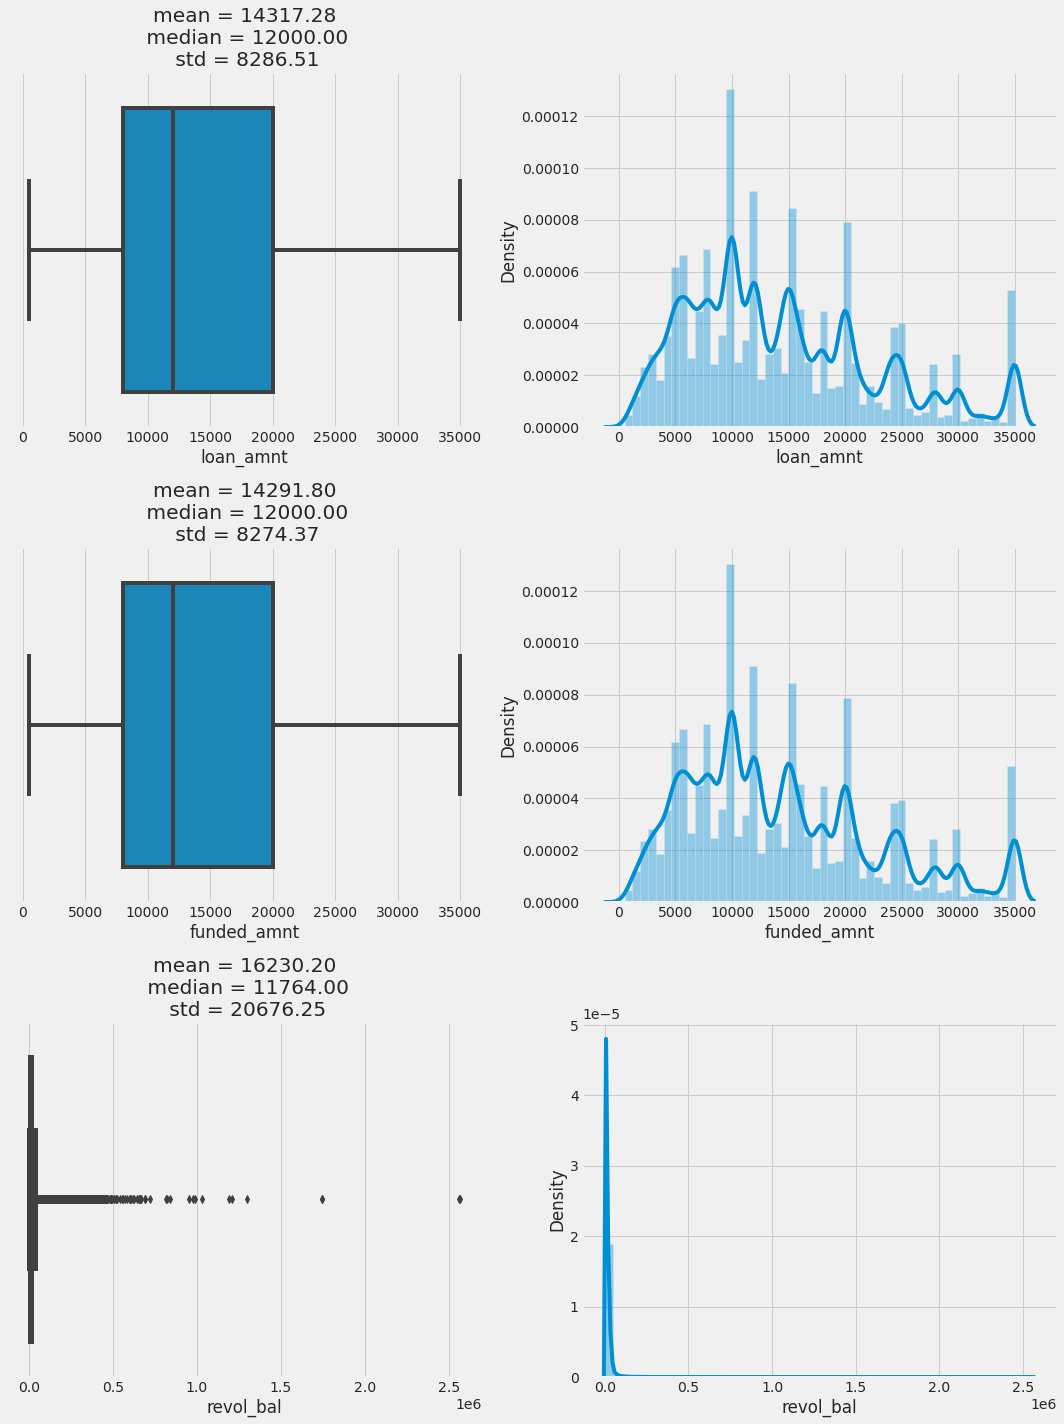

In [38]:
num_int = ['loan_amnt','funded_amnt','revol_bal']

plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    for i, kol in enumerate(features):
	    sns.boxplot(df_load[kol], ax = axs[i][0])
	    sns.distplot(df_load[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_load[kol].mean(), df_load[kol].median(), df_load[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(num_int) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

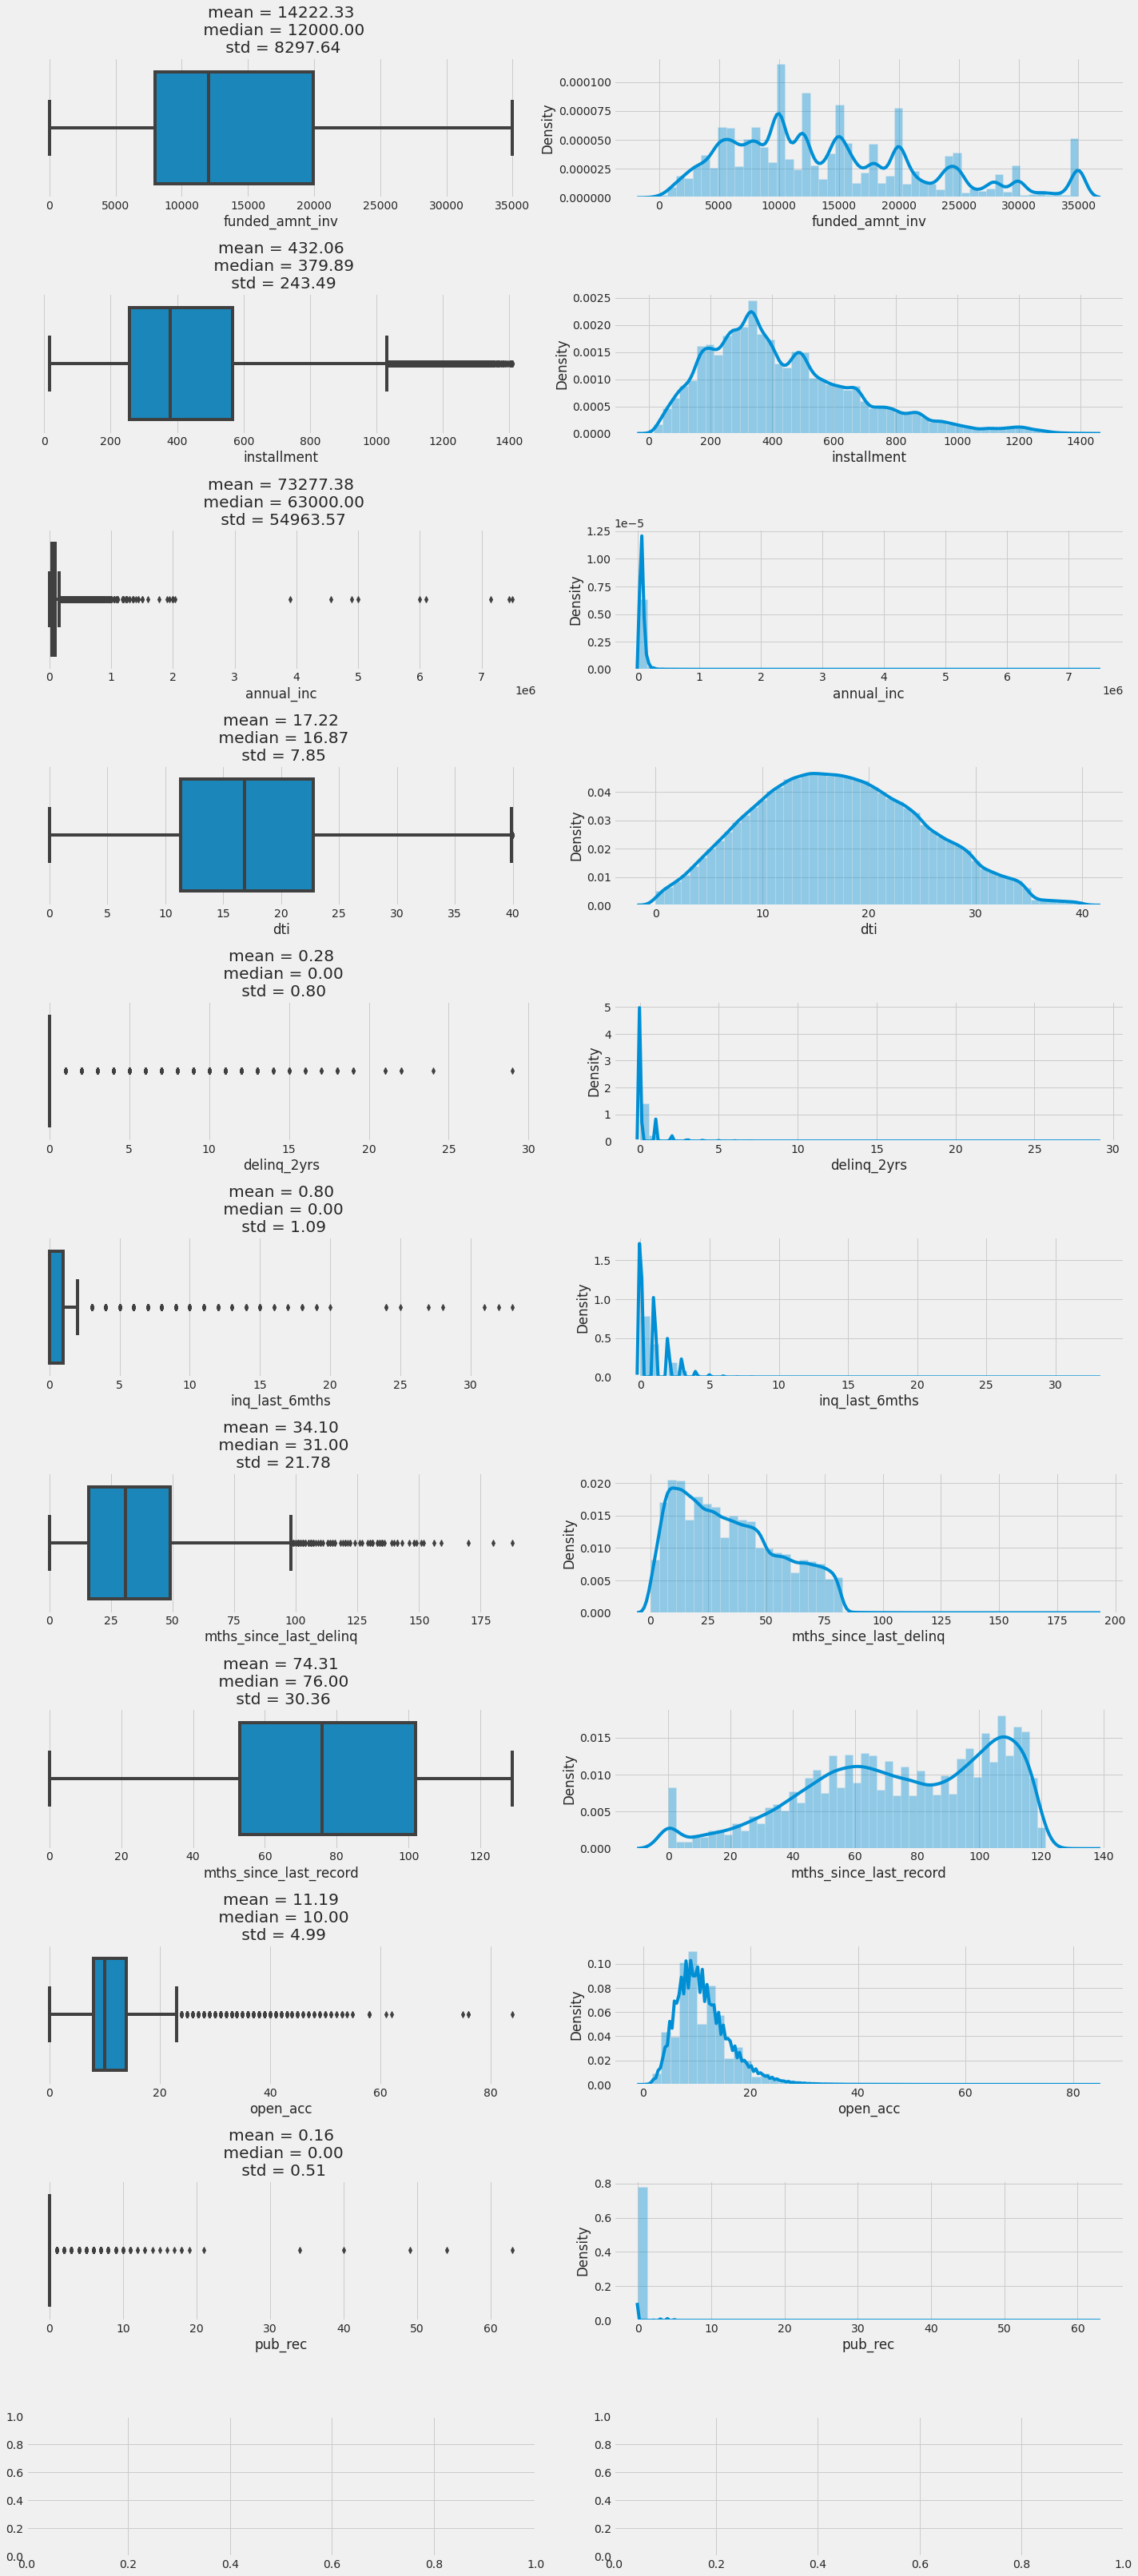

In [39]:
num_float = ['funded_amnt_inv','installment','annual_inc',
             'dti','delinq_2yrs','inq_last_6mths',
             'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec']


plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(11, 2, figsize=(20, 45))
    for i, kol in enumerate(features):
	    sns.boxplot(df_load[kol], ax = axs[i][0])
	    sns.distplot(df_load[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_load[kol].mean(), df_load[kol].median(), df_load[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(num_float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

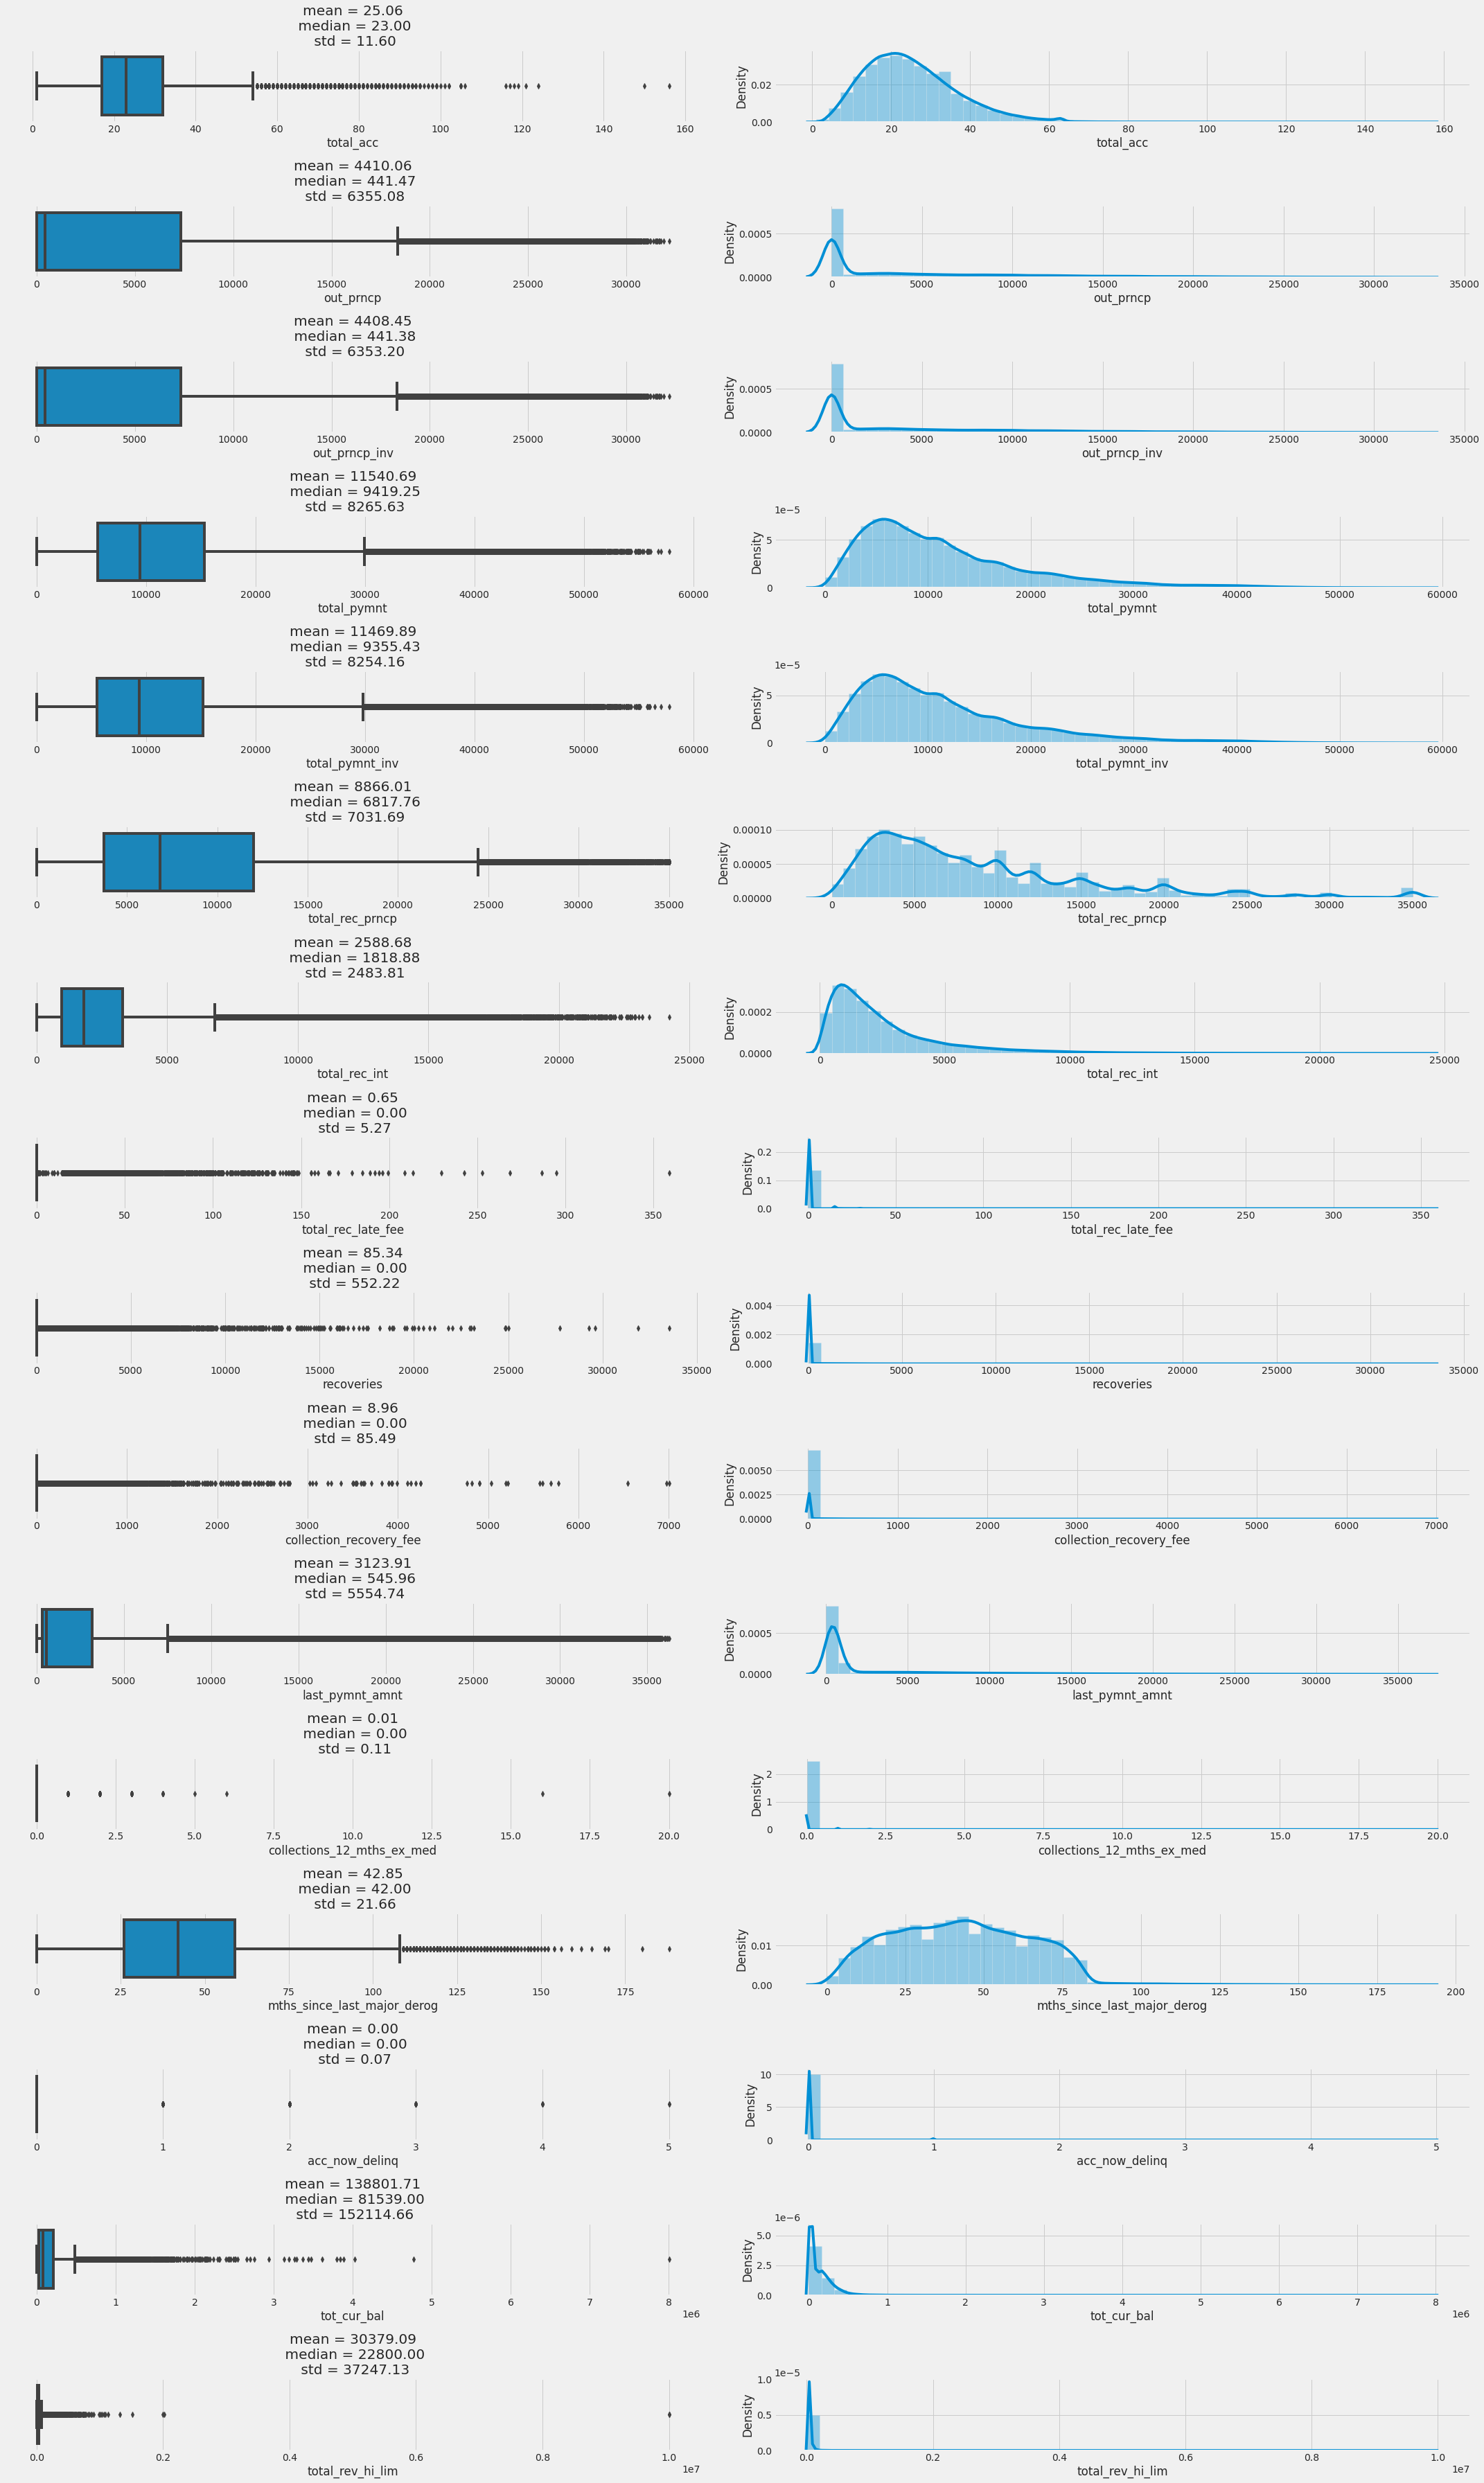

In [40]:
num_float2 = ['total_acc','out_prncp','out_prncp_inv','total_pymnt',
              'total_pymnt_inv','total_rec_prncp','total_rec_int',
              'total_rec_late_fee','recoveries','collection_recovery_fee',
              'last_pymnt_amnt','collections_12_mths_ex_med',
              'mths_since_last_major_derog','acc_now_delinq','tot_cur_bal',
              'total_rev_hi_lim']


plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(16, 2, figsize=(30, 50))
    for i, kol in enumerate(features):
	    sns.boxplot(df_load[kol], ax = axs[i][0])
	    sns.distplot(df_load[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_load[kol].mean(), df_load[kol].median(), df_load[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(num_float2)

#**Exploratory Data Analysis numerical x caterogical**

###**term_months**

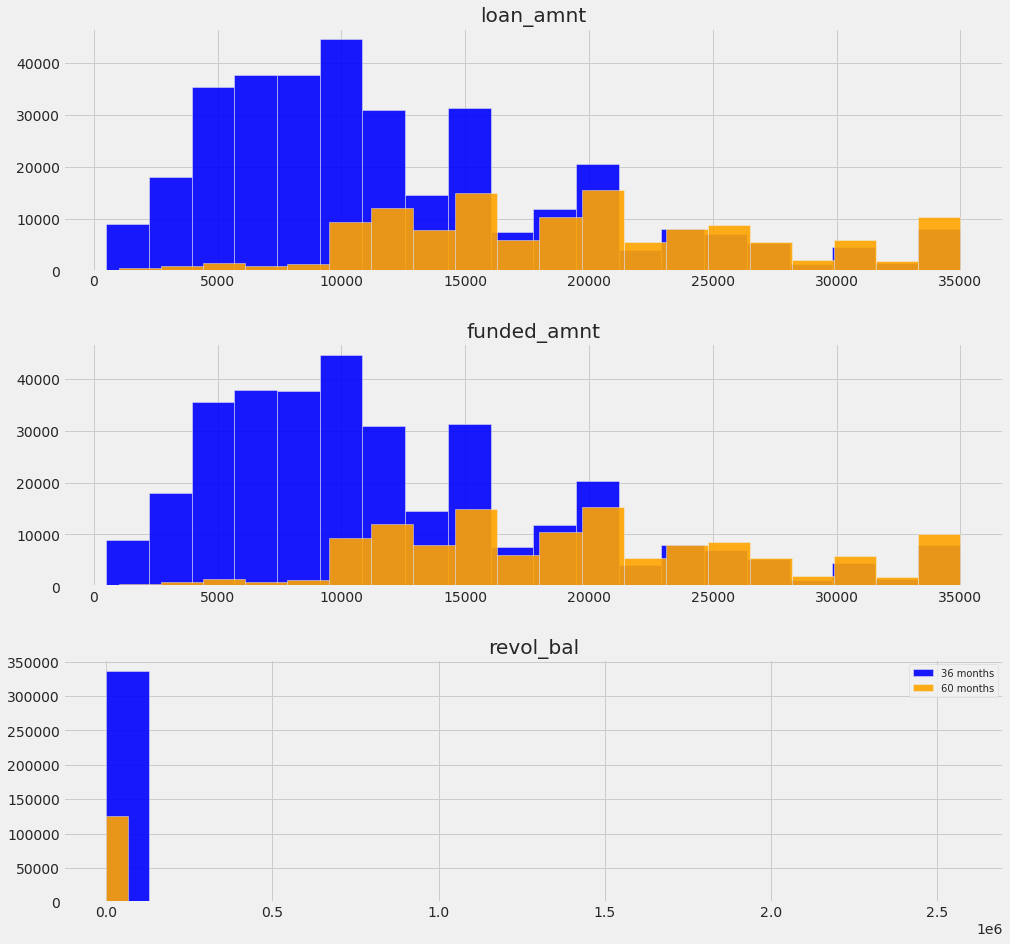

In [41]:
fig, ax = plt.subplots(3, figsize=(15, 15))

df_load[df_load.term_months == 36][num_int].hist(bins=20, color='blue', alpha=0.9, ax=ax)
df_load[df_load.term_months == 60][num_int].hist(bins=20, color='orange', alpha=0.9, ax=ax)
plt.legend(['36 months', '60 months'], loc='upper right', prop={'size':10})
plt.show()

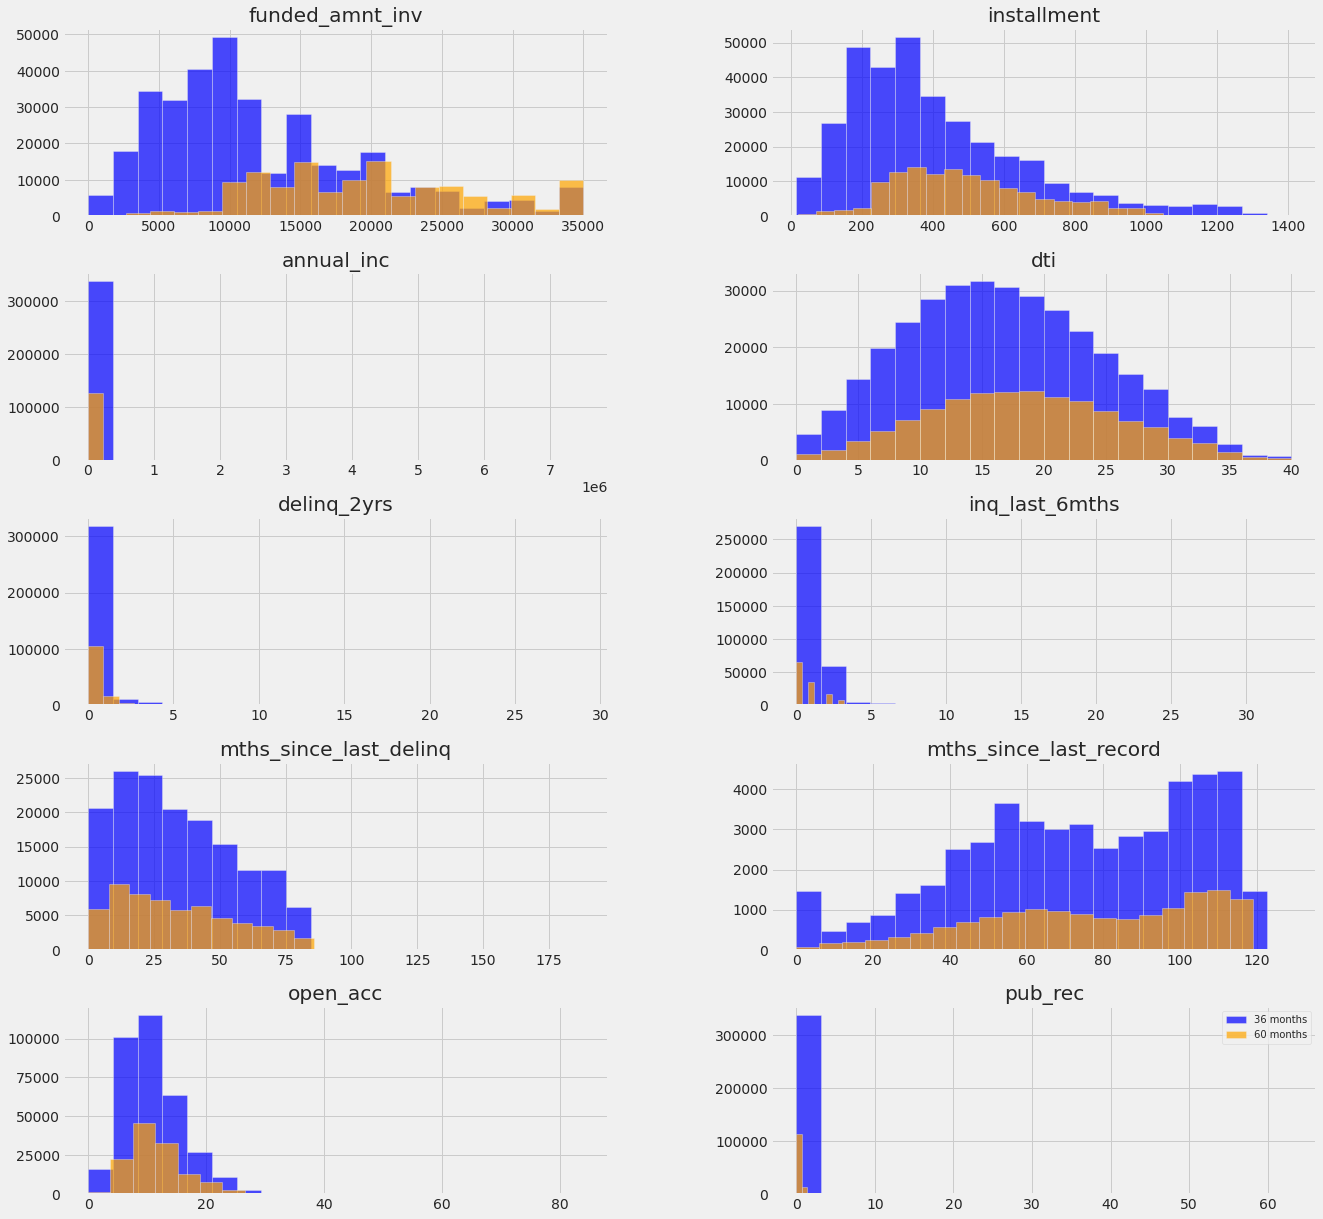

In [42]:
fig, ax = plt.subplots(5,2, figsize=(20, 20))

df_load[df_load.term_months == 36][num_float].hist(bins=20, color='blue', alpha=0.7, ax=ax)
df_load[df_load.term_months == 60][num_float].hist(bins=20, color='orange', alpha=0.7, ax=ax)
plt.legend(['36 months', '60 months'], loc='upper right', prop={'size':10})

plt.show()

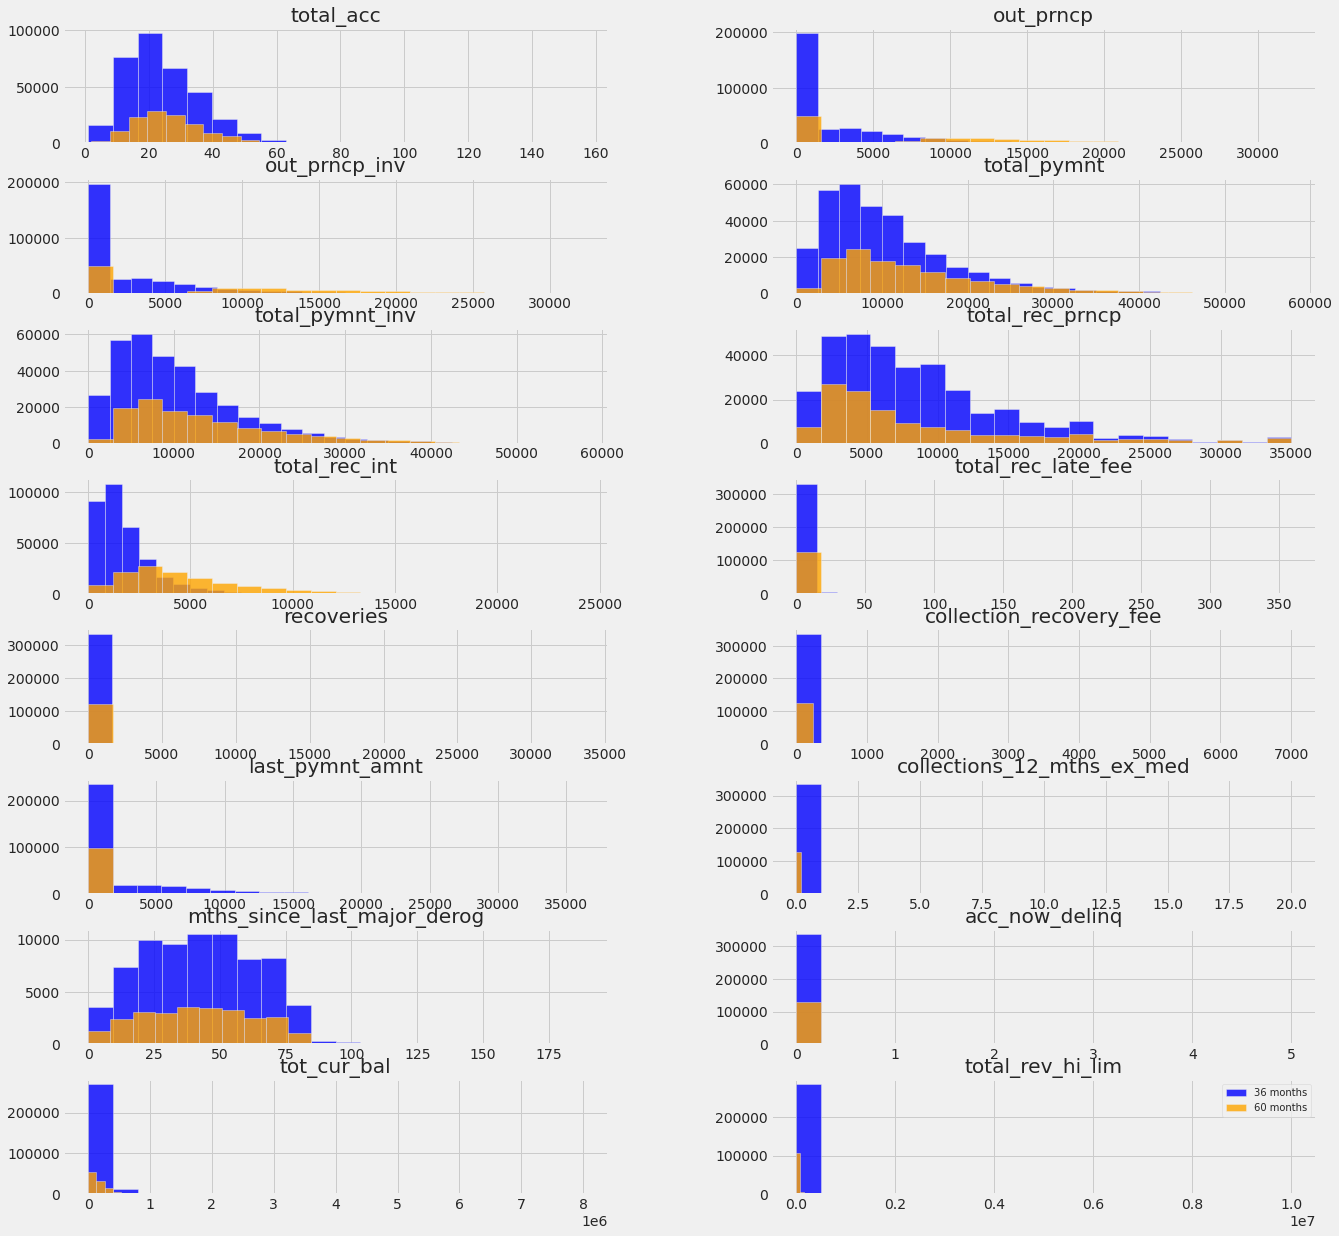

In [43]:
fig, ax = plt.subplots(8,2, figsize=(20, 20))

df_load[df_load.term_months == 36][num_float2].hist(bins=20, color='blue', alpha=0.8, ax=ax)
df_load[df_load.term_months == 60][num_float2].hist(bins=20, color='orange', alpha=0.8, ax=ax)
plt.legend(['36 months', '60 months'], loc='upper right', prop={'size':10})

plt.show()

###**loan_amt**

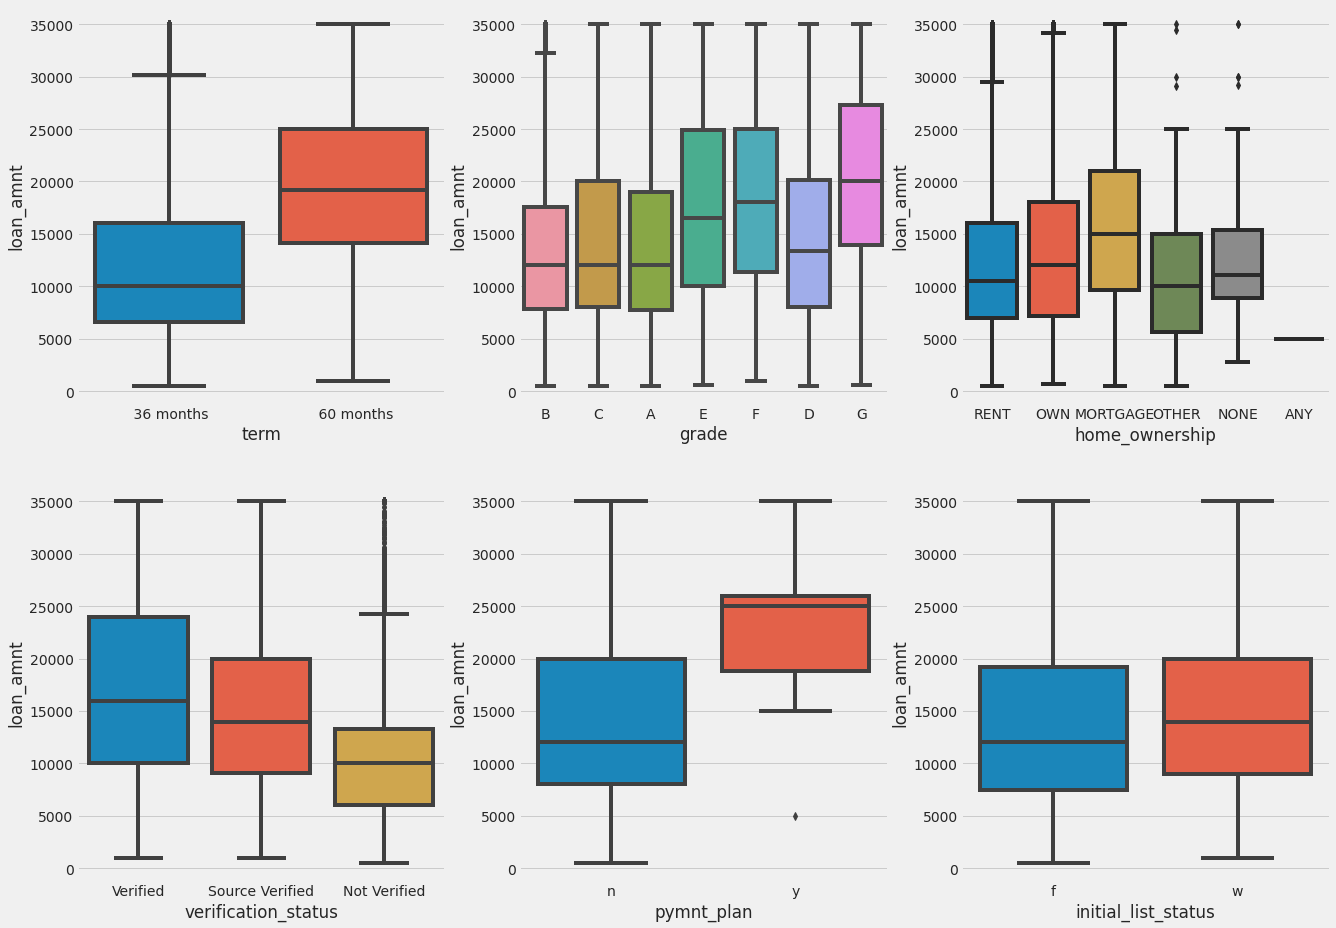

In [44]:
categorical = ['term','grade','home_ownership','verification_status','pymnt_plan','initial_list_status']


fig, ax = plt.subplots(2,3, figsize=(20, 15))
for var, subplot in zip(categorical, ax.flatten()):
  sns.boxplot(x=var, y='loan_amnt', data=df_load, ax=subplot)

plt.show()  

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

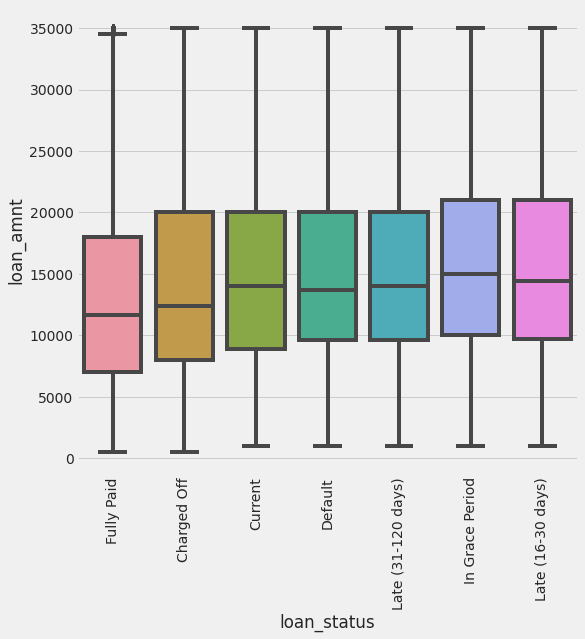

In [45]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_load)
plt.ylabel('loan_amnt')
plt.xticks(rotation=90)